# Model Analisys
## For the analysis of the Toxic users in twitter we made the respective EDA, where we find features that will be useful in the models we use below.

In [1]:
#Author: Marlon Segarra
# Proyecto de Mineria de datos
# Version 3.0
# 2do término 2018-2019
#Implementación de modelos de Machine Learning
#Librerias usadas
library(MASS)
library(caTools)
library(caret)
library(ROCR)
library(ggplot2)
#Visualizacion de los datos
setwd("C:/Users/LENOVO/Desktop/Proyecto-Mineria/")
tweets<-read.csv("toxic_tweets.csv")
tweets<-tweets[c(1,2,3,4,7,5,6,14,8,9,10,11,12,13)]
tweets[1:10,]
tweets$mentions<-as.numeric(tweets$mentions)
tweets$num_bad_words<-as.numeric(tweets$num_bad_words)
tweets$toxic<-as.numeric(tweets$toxic)
set.seed(1234)
str(tweets)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



timestamp,timestamp.1,screen_name,text,Tweet_lemmatized,mentions,sentiment,num_bad_words,toxic,severe_toxic,obscene,threat,identity_hate,insult
2012-01-28 16:10:53,2012-01-28 16:10:53,LeninArtieda,"bajaron de Ciudad Alfaro a Montecristi. Algunos se quedaron escuchando al Presidente, otros se fueron.","['', 'ciudad', 'alfaro', 'montecristi', 'quedaron', 'escuchando', 'presidente']",1,0.0000,0,0,0,0,0,0,0
2012-01-28 16:19:50,2012-01-28 16:19:50,javi_300,Me parece raro que hayan planificado un show al mismo tiempo de la sabatina ya q es obvio q todos iban a ir pa alla,"['', 'parece', 'raro', 'planificado', 'show', 'mismo', 'tiempo', 'sabatina', 'obvio', 'iban', 'ir', 'pa', 'alla']",2,0.0000,0,0,0,0,0,0,0
2012-07-23 16:52:04,2012-07-23 16:52:04,ElGuille1981,"jajaja estamos en la mierda, maldita llegada de los 30","['', 'mierda', 'maldita', 'llegada', '']",2,0.0000,1,0,0,0,0,0,1
2012-07-30 21:08:59,2012-07-30 21:08:59,OmarVLuna,Bien Gongora!!!,"['bien', 'gongora']",0,0.0000,0,0,0,0,0,0,0
2012-08-12 23:33:07,2012-08-12 23:33:07,Ceagd,RT Arroyo gana pelota a GimÃ©nez y Gol de DÃ­az; desde la lejanÃ­a derechazo memorable..21'// memorable ab,"['arroyo', 'gana', 'pelota', 'gimÃ©nez', 'gol', 'dÃ­az', 'derechazo', 'memorable', 'memorable']",1,0.0000,0,0,0,0,0,0,0
2012-09-23 19:51:49,2012-09-23 19:51:49,williamludena,Saludos hermano!,"['', 'saludos', 'hermano']",1,0.0000,0,0,0,0,0,0,0
2012-10-10 11:39:41,2012-10-10 11:39:41,rhernandeztv,"Glad to hear fom you,","['glad', 'to', 'hear', 'fom', 'you', '']",1,0.4588,0,0,0,0,0,0,0
2013-02-24 01:03:20,2013-02-24 1:03:20,egasic,de q vale la libertadores si en el campeonato stamos n la mierda ese Castillejos es una dsgracia,"['', 'vale', 'libertadores', 'si', 'campeonato', 'stamos', 'n', 'mierda', 'castillejos', 'dsgracia']",3,0.0000,1,1,0,0,0,0,0
2013-04-11 12:30:24,2013-04-11 12:30:24,ivonnelago,Para ser estÃºpido y descriteriado no se necesita estudiar.,"['ser', 'estÃºpido', 'descriteriado', 'necesita', 'estudiar']",0,-0.2960,0,0,0,0,0,0,1
2013-08-18 04:13:45,2013-08-18 4:13:45,christianalban,Ser bueno no es sinÃ³nimo de ser idiota. Ser bueno es una virtud que algunos idiotas no entienden.,"['ser', 'bueno', 'sinÃ³nimo', 'ser', 'idiota', 'ser', 'bueno', 'virtud', 'idiotas', 'entienden']",0,-0.5267,0,0,0,0,0,0,1


'data.frame':	600 obs. of  14 variables:
 $ timestamp       : Factor w/ 597 levels "2012-01-28 16:10:53",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ timestamp.1     : Factor w/ 597 levels "2012-01-28 16:10:53",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ screen_name     : Factor w/ 507 levels "_fbsc","_iXiomara",..: 297 250 171 381 98 496 431 164 247 116 ...
 $ text            : Factor w/ 597 levels "        https://t.co/lMybQxmSU1",..: 213 126 107 500 572 424 533 36 560 578 ...
 $ Tweet_lemmatized: Factor w/ 595 levels "['', '']","['', 'Ã¡rbitro', 'hdp', 'mierda', 'inciden', 'marcador', 'si', 'seguro', 'meta', 'bandera', 'c', '']",..: 81 313 275 495 484 396 527 452 573 572 ...
 $ mentions        : num  1 2 2 0 1 1 1 3 0 0 ...
 $ sentiment       : num  0 0 0 0 0 ...
 $ num_bad_words   : num  0 0 1 0 0 0 0 1 0 0 ...
 $ toxic           : num  0 0 0 0 0 0 0 1 0 0 ...
 $ severe_toxic    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ obscene         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ threat          : int  0 0 0 0 0 0 0 0 0 0 ..

## Creacion del training y el test set para la posterior evaluacion de los modelos

In [2]:
tweets <- tweets[complete.cases(tweets), ]
#Creación de la partición 
trainIndex <- createDataPartition(tweets$toxic, times = 1,p = .7,list = FALSE)
toxicTrain <- tweets[trainIndex,]
toxicTest <- tweets[-trainIndex,]
testValues <- toxicTest$toxic

## Primer modelo
## Regresion Logistica
### La regresión logística es útil cuando predice un resultado binario a partir de un conjunto de variables predictoras continuas, por ende es perfecta para predecir si nuestro usuario es o no es toxico ya que el resultado es binario

In [3]:
#Usando regresion Logitica
set.seed(1)
modelo <- glm(toxic ~ mentions + sentiment + num_bad_words , data = toxicTrain,
              family = binomial(link = "logit"))
summary(modelo)
confint(modelo)
#Realizando la respectiva predicción
predicted_values<-ifelse(predict(modelo,type="response")>.1, 1, 0)
actual_values<-toxicTrain$toxic
# Mostramos la matriz de confusión correspondiente
conf_matrix<-table(predicted_values,actual_values)
conf_matrix


Call:
glm(formula = toxic ~ mentions + sentiment + num_bad_words, family = binomial(link = "logit"), 
    data = toxicTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6956  -0.4008  -0.3780  -0.3500   2.4316  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.4813     0.3017  -8.225   <2e-16 ***
mentions       -0.1217     0.1702  -0.715   0.4746    
sentiment       0.5379     0.9456   0.569   0.5695    
num_bad_words   0.6536     0.2449   2.669   0.0076 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 240.94  on 419  degrees of freedom
Residual deviance: 234.16  on 416  degrees of freedom
AIC: 242.16

Number of Fisher Scoring iterations: 5


Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-3.0949635,-1.9091605
mentions,-0.4885983,0.1801797
sentiment,-1.2808405,2.3986107
num_bad_words,0.1552618,1.1237584


                actual_values
predicted_values   0   1
               0 312  16
               1  73  19

## Calculo del accuracy y error tanto del training como el test set

In [4]:
# Obtenemos los gráficos de specificity, sensitivity
#Specificity
specificity_value<-conf_matrix[2,2]/(conf_matrix[2,2]+conf_matrix[2,1])
print('Specificcity del train')
specificity_value

#Sensitivity
sensitivity_value<-conf_matrix[1,1]/(conf_matrix[1,2]+conf_matrix[1,1])
print('Sensitivity del train')
sensitivity_value

#Accuracy
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del train')
accuracy_value

#Error del train
error<-1-accuracy_value
print('Error del train')
error

#test error
predicted_values<-ifelse(predict(modelo,newdata = toxicTest,type="response")>.1,1,0)
actual_values<-toxicTest$toxic

# Matriz de confusión
conf_matrix<-table(predicted_values,actual_values)
print('Matriz de confusion del test')
conf_matrix

#Specificcity del tes
specificity_value<-conf_matrix[2,2]/(conf_matrix[2,2]+conf_matrix[2,1])
print('Specificcity del test')
specificity_value

#print('Sensitivity del test')
sensitivity_value<-conf_matrix[1,1]/(conf_matrix[1,2]+conf_matrix[1,1])
print('Sensitivity del test')
sensitivity_value

#Accuracy del test
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del test')
accuracy_value

#Error del test
error<-1-accuracy_value
print('Error del test')
error

[1] "Specificcity del train"


[1] 0.2065217

[1] "Sensitivity del train"


[1] 0.9512195

[1] "Accuracy del train"


[1] 0.7880952

[1] "Error del train"


[1] 0.2119048

[1] "Matriz de confusion del test"


                actual_values
predicted_values   0   1
               0 133   6
               1  32   9

[1] "Specificcity del test"


[1] 0.2195122

[1] "Sensitivity del test"


[1] 0.9568345

[1] "Accuracy del test"


[1] 0.7888889

[1] "Error del test"


[1] 0.2111111

## Gráficas del primer modelo


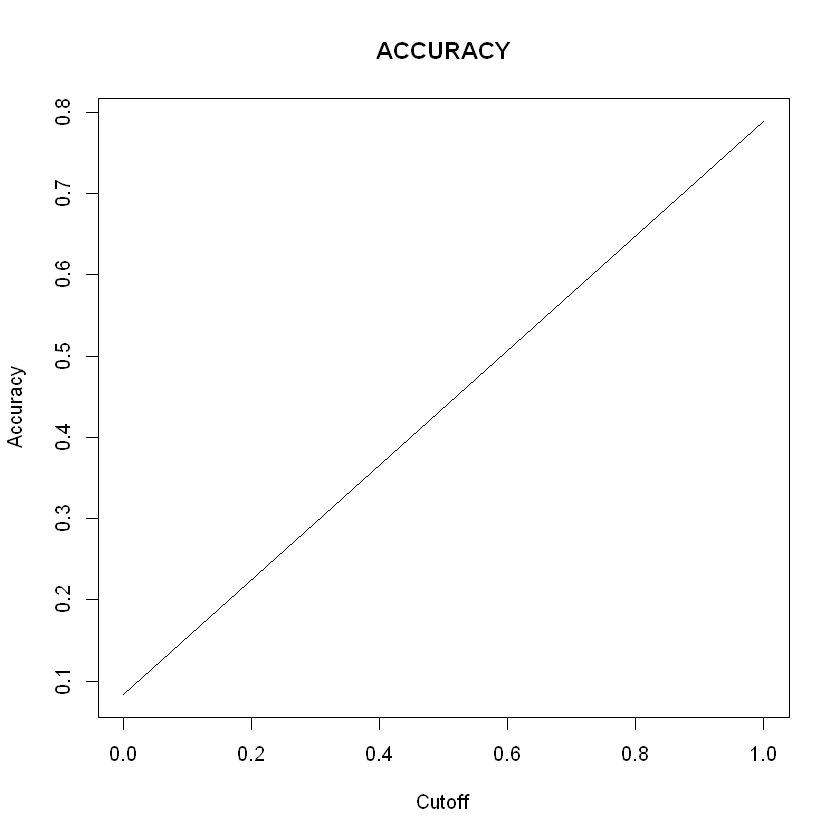

In [5]:
library(e1071)
library(ROCR)
#ACCURACY CON CUTOFF
prediction_tweets<-prediction(predicted_values,toxicTest$toxic)
perf<-performance(prediction_tweets,"acc")
plot(perf)
title('ACCURACY')

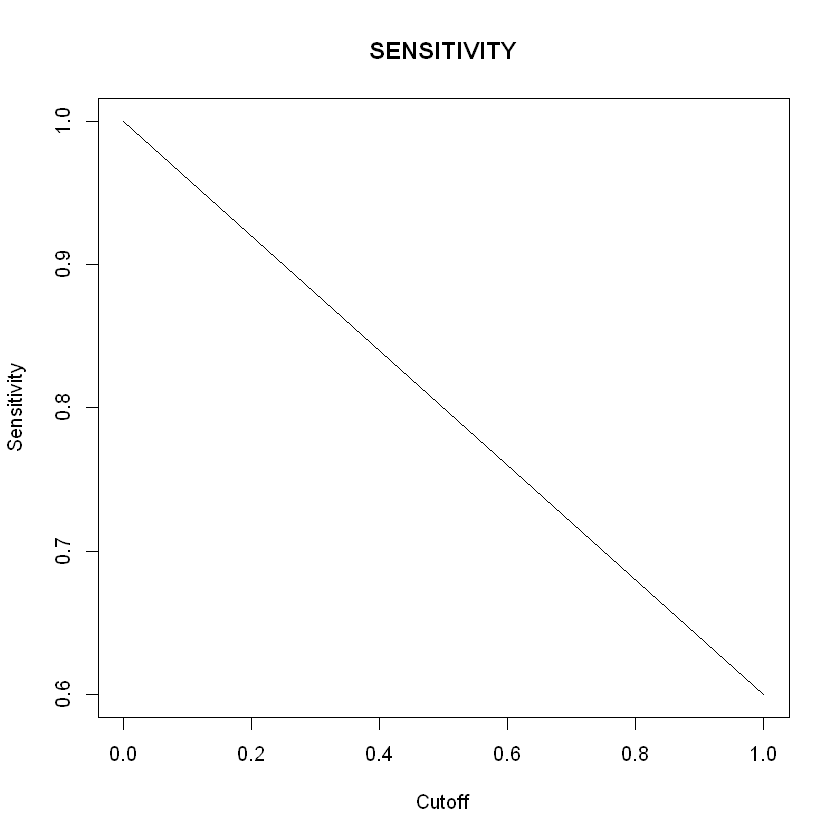

In [6]:
#SENSITIVITY CON CUTOFF
perf2<-performance(prediction_tweets,"sens")
plot(perf2)
title('SENSITIVITY')

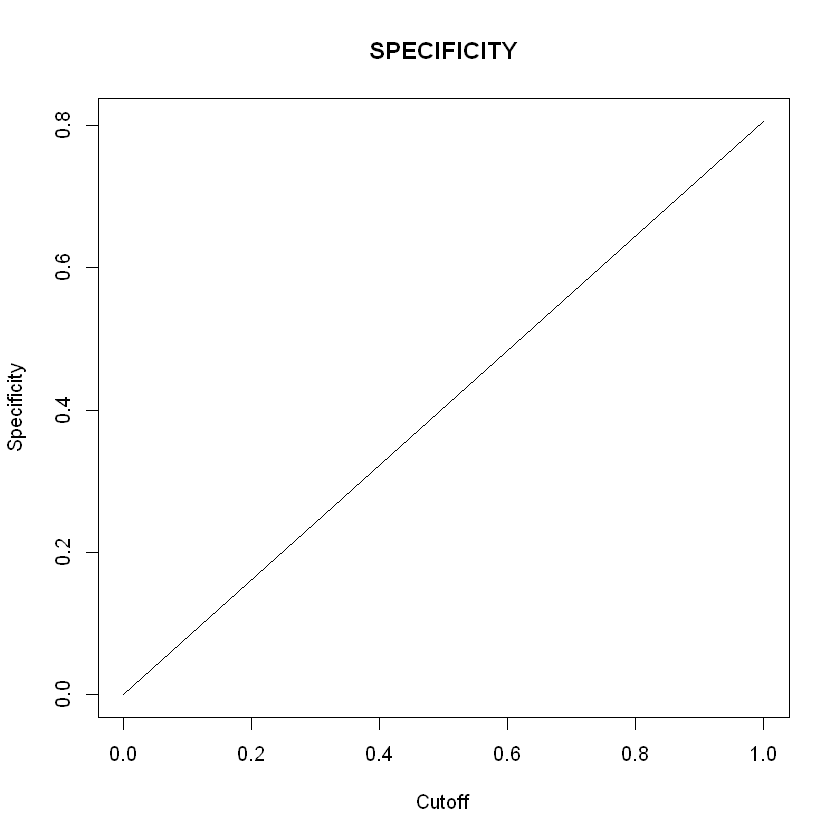

In [7]:

#SPECIFICITY CON CUTOFF
perf3<-performance(prediction_tweets,"spec")
plot(perf3)
title('SPECIFICITY')

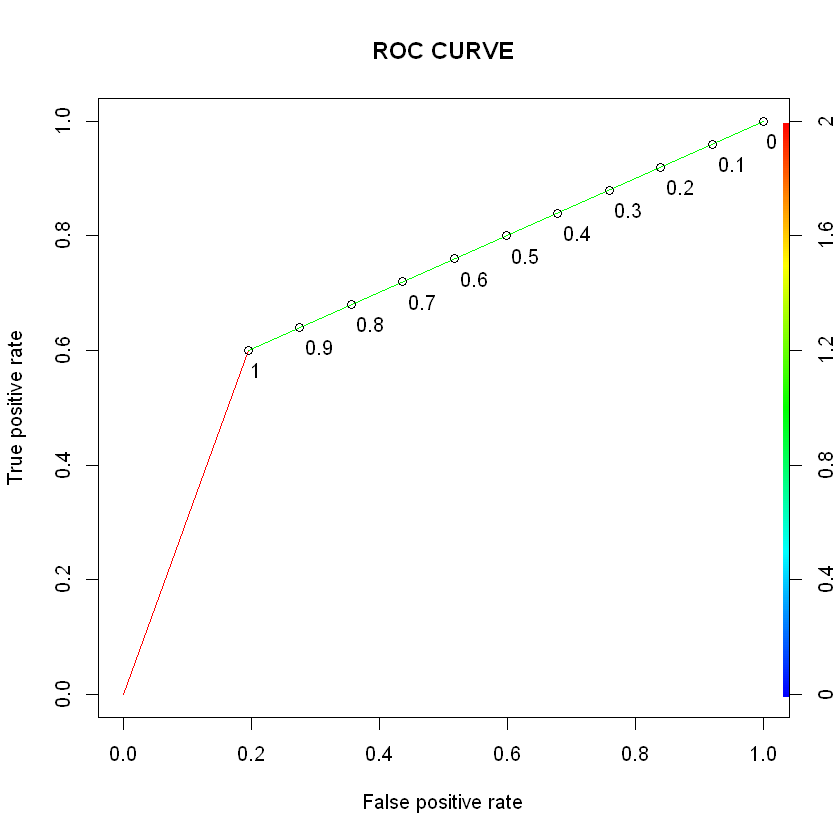

In [8]:
#CURVA ROC
perf4<-performance(prediction_tweets,"tpr","fpr")
plot(perf4, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('ROC CURVE')

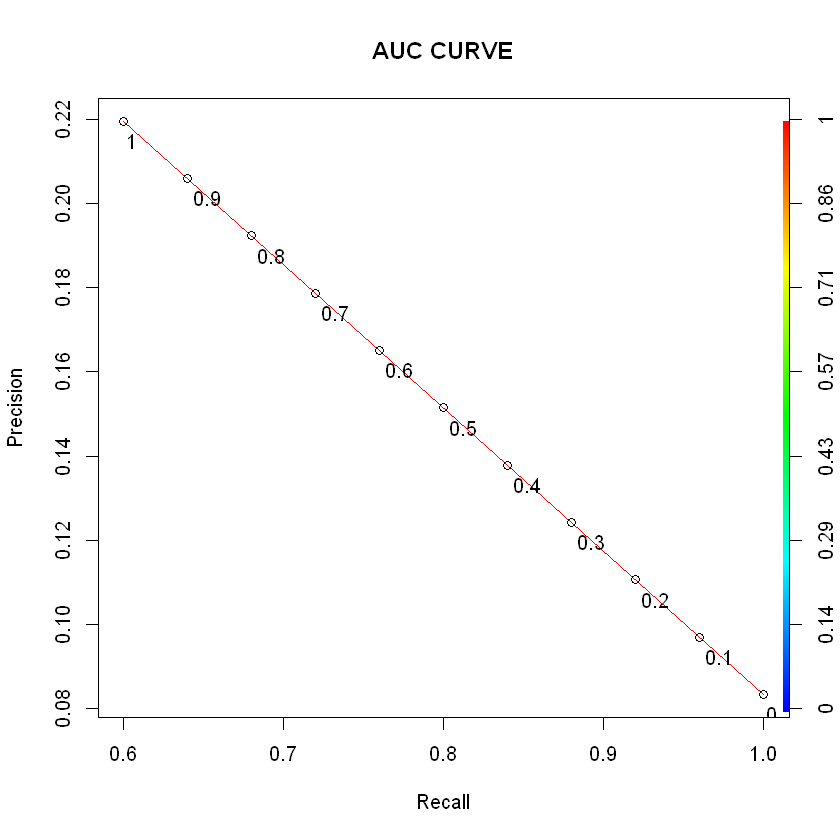

In [9]:
#Curva AUC
ROCRrec <- performance(prediction_tweets, measure = "prec", x.measure = "rec")
plot(ROCRrec, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('AUC CURVE')

## Ridge Regression
### Se realizara una comparacion entre el modelo lineal y aquella con ridge regression para mostrar las diferencias del mismo

In [10]:
#Modelo con Ridge Regression
lmMod <- lm(toxic ~ mentions + sentiment + num_bad_words, toxicTrain)  # the linear reg model
summary (lmMod) # get summary
predicted <- ifelse(predict (lmMod, toxicTrain)>.1,1,0)  # predict on test data

#Matriz de confusión del train
conf_matrix<-table(predicted,toxicTrain$toxic)
print('TRAIN')
print('Matriz de confusion')
conf_matrix

#Accuracy del modelo
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del modelo')
accuracy_value

#Error del modelo
print('Error del modelo')
1-accuracy_value
predicted <- ifelse(predict (lmMod, toxicTest)>.1,1,0)  # predict on test data
conf_matrix<-table(predicted,toxicTest$toxic)

#Matriz de confusion del test
print('TEST')
print('Matriz de confusion')
conf_matrix

#Accuracy del modelo
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del modelo')
accuracy_value

#Error del modelo
print('Error del modelo')
1-accuracy_value
library(ridge)


Call:
lm(formula = toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19260 -0.07690 -0.06896 -0.05837  0.95098 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.076897   0.021619   3.557 0.000418 ***
mentions      -0.007933   0.011258  -0.705 0.481443    
sentiment      0.035782   0.068030   0.526 0.599185    
num_bad_words  0.061817   0.022574   2.738 0.006439 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2751 on 416 degrees of freedom
Multiple R-squared:  0.01853,	Adjusted R-squared:  0.01145 
F-statistic: 2.618 on 3 and 416 DF,  p-value: 0.05055


[1] "TRAIN"
[1] "Matriz de confusion"


         
predicted   0   1
        0 306  15
        1  79  20

[1] "Accuracy del modelo"


[1] 0.7761905

[1] "Error del modelo"


[1] 0.2238095

[1] "TEST"
[1] "Matriz de confusion"


         
predicted   0   1
        0 130   6
        1  35   9

[1] "Accuracy del modelo"


[1] 0.7722222

[1] "Error del modelo"


[1] 0.2277778

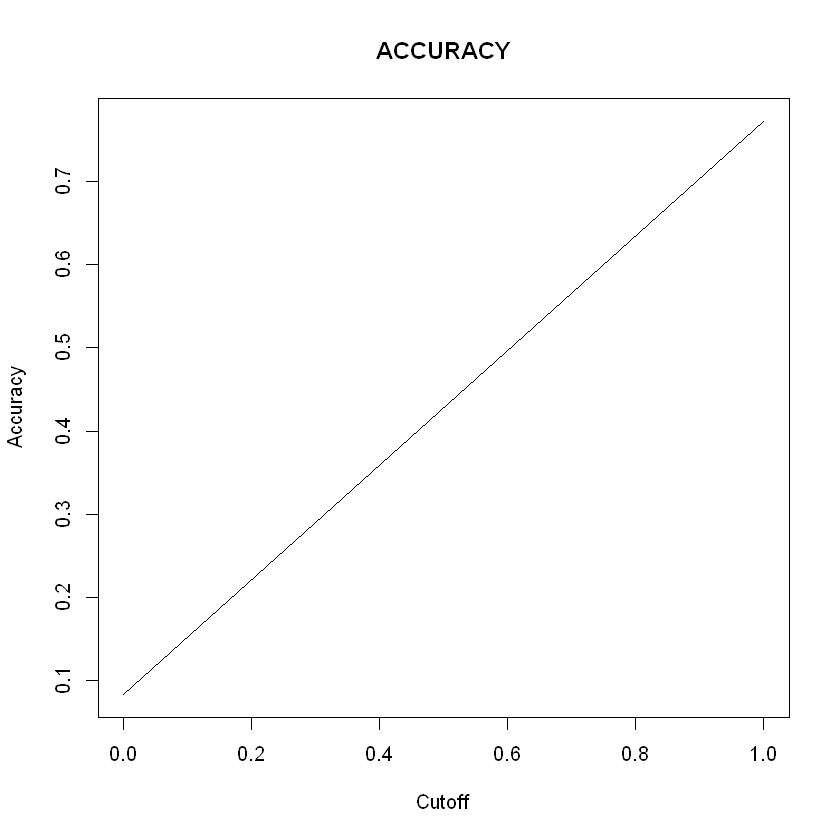

In [11]:
#ACCURACY CON CUTOFF
prediction_tweetsm2<-prediction(predicted,toxicTest$toxic)
perf<-performance(prediction_tweetsm2,"acc")
plot(perf)
title('ACCURACY')


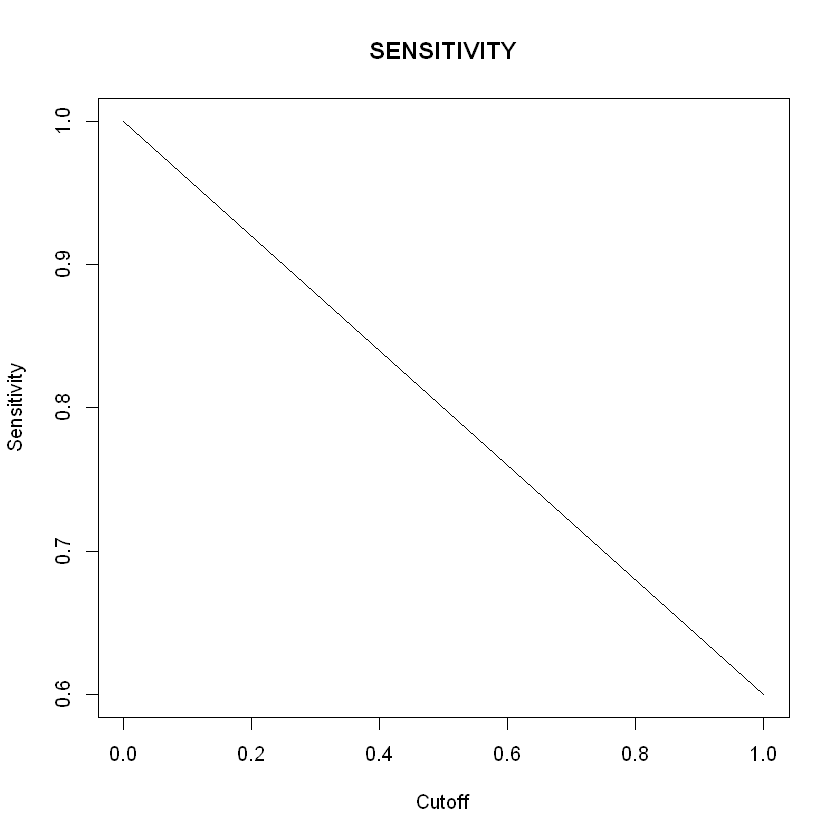

In [12]:
#SENSITIVITY CON CUTOFF
perf2<-performance(prediction_tweetsm2,"sens")
plot(perf2)
title('SENSITIVITY')

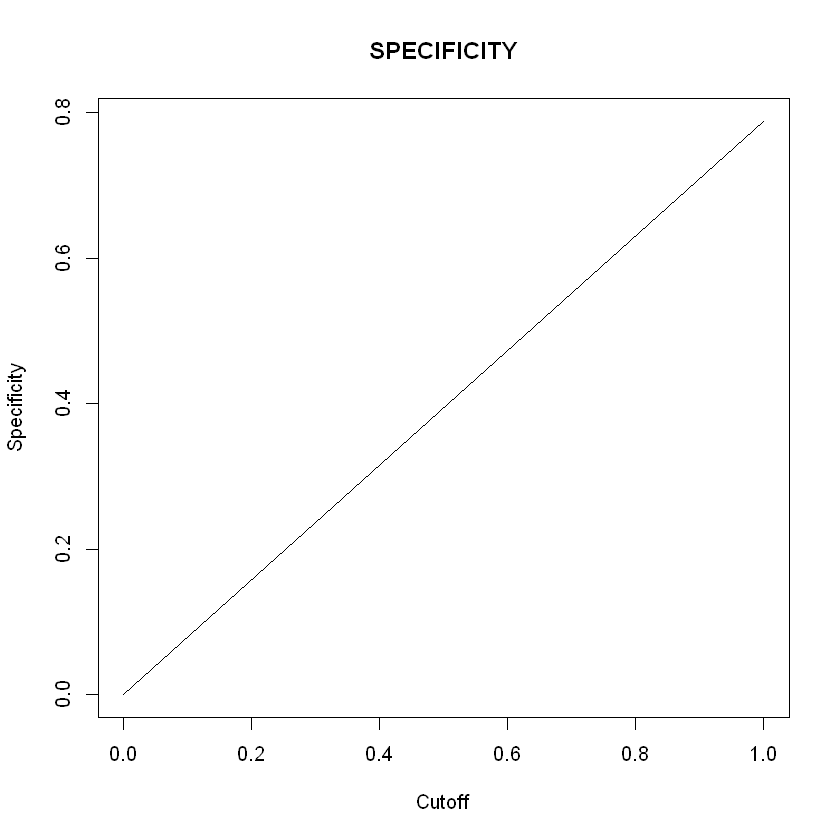

In [13]:
#SPECIFICITY CON CUTOFF
perf3<-performance(prediction_tweetsm2,"spec")
plot(perf3)
title('SPECIFICITY')

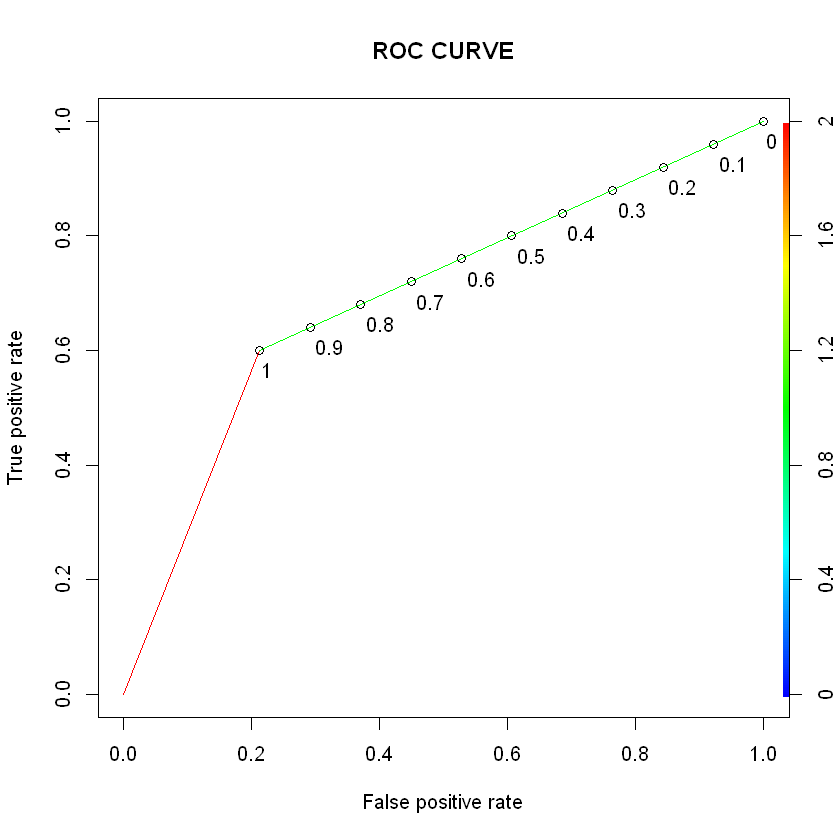

In [14]:
#CURVA ROC
perf4<-performance(prediction_tweetsm2,"tpr","fpr")
plot(perf4, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('ROC CURVE')

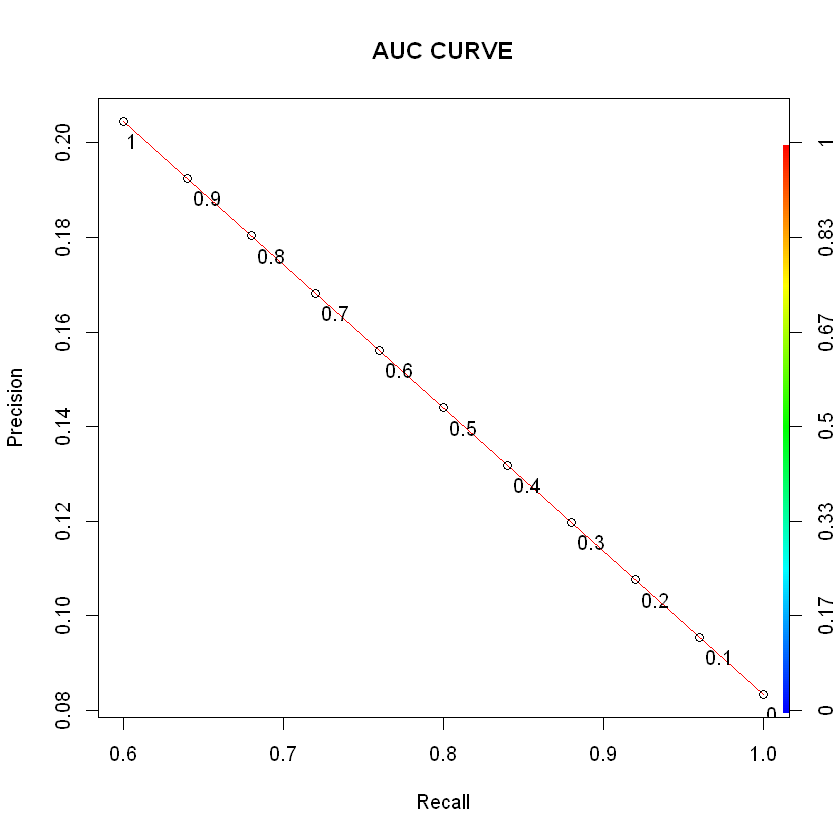

In [15]:
#Curva AUC
ROCRrec <- performance(prediction_tweetsm2, measure = "prec", x.measure = "rec")
plot(ROCRrec, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('AUC CURVE')

### Comparando el modelo lineal con Ridge Regression

In [16]:
#Utilizando el modelo de Ridge Regression
linRidgeMod <- linearRidge(toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain)
predicted <- ifelse(predict(linRidgeMod, toxicTrain)>.1,1,0)

# Matriz de confusión del train
conf_matrix<-table(predicted,toxicTrain$toxic)
print('TRAIN')
print('Matriz de confusion con ridge regression')
conf_matrix

#Accuracy del modelo
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del modelo')
accuracy_value

#Error del modelo
print('Error del modelo')
1-accuracy_value

#Matriz de confusión del test
predicted <- ifelse(predict(linRidgeMod, toxicTest)>.1,1,0)
conf_matrix<-table(predicted,toxicTest$toxic)
print('TEST')
print('Matriz de confusion con ridge regression')
conf_matrix

#Accuracy del test
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del modelo')
accuracy_value

#Error del test
print('Error del modelo')
1-accuracy_value

[1] "TRAIN"
[1] "Matriz de confusion con ridge regression"


         
predicted   0   1
        0 307  15
        1  78  20

[1] "Accuracy del modelo"


[1] 0.7785714

[1] "Error del modelo"


[1] 0.2214286

[1] "TEST"
[1] "Matriz de confusion con ridge regression"


         
predicted   0   1
        0 131   6
        1  34   9

[1] "Accuracy del modelo"


[1] 0.7777778

[1] "Error del modelo"


[1] 0.2222222

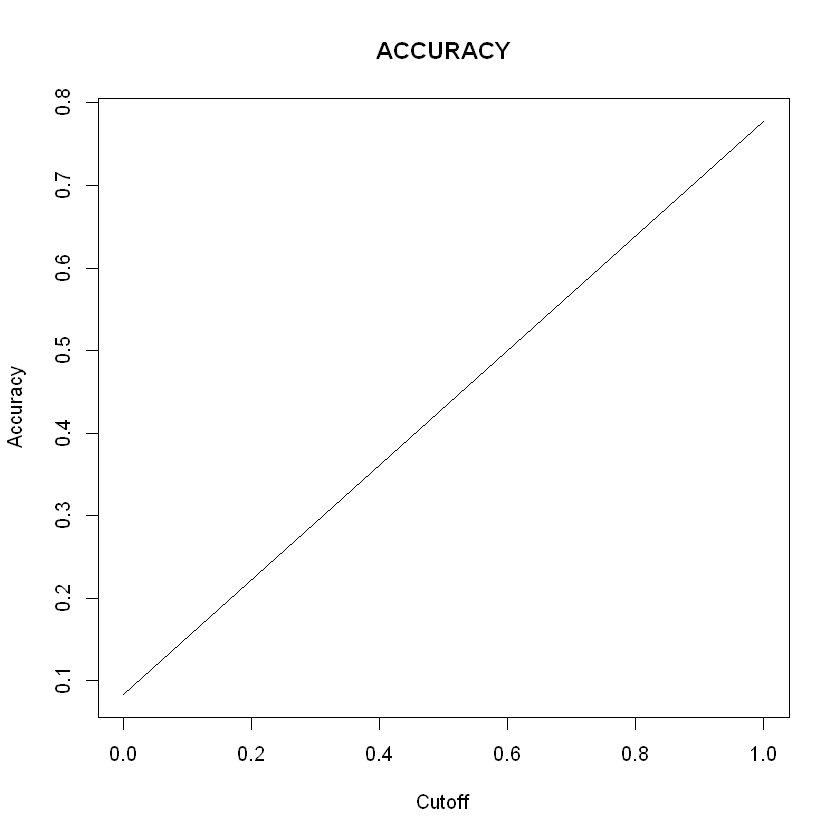

In [17]:
#ACCURACY CON CUTOFF
prediction_tweetsrr<-prediction(predicted,toxicTest$toxic)
perf<-performance(prediction_tweetsrr,"acc")
plot(perf)
title('ACCURACY')

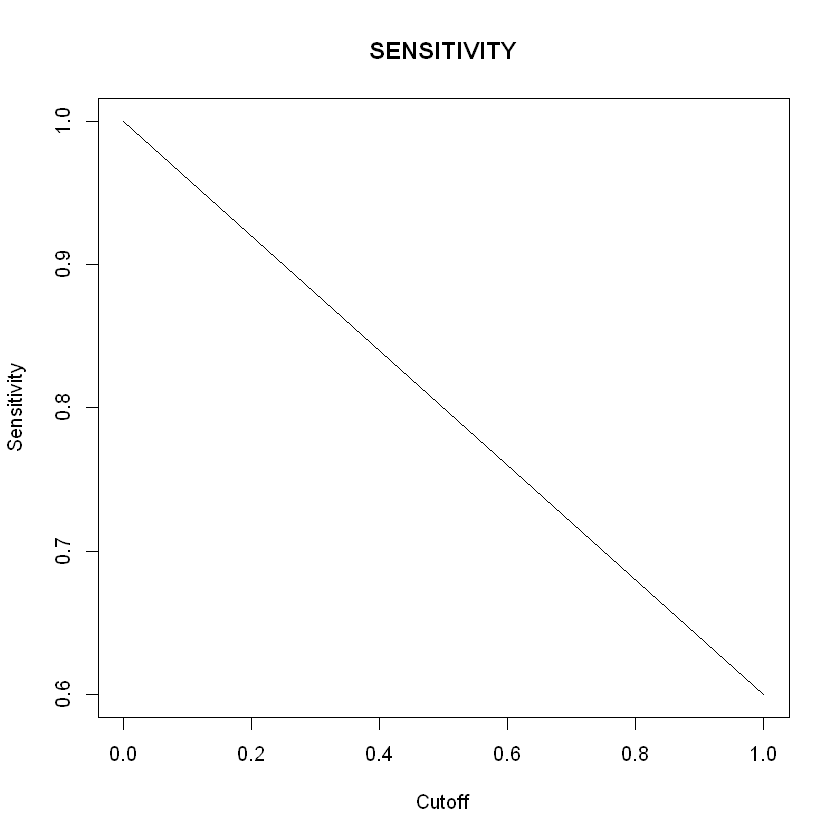

In [18]:
#SENSITIVITY CON CUTOFF
perf2<-performance(prediction_tweetsrr,"sens")
plot(perf2)
title('SENSITIVITY')

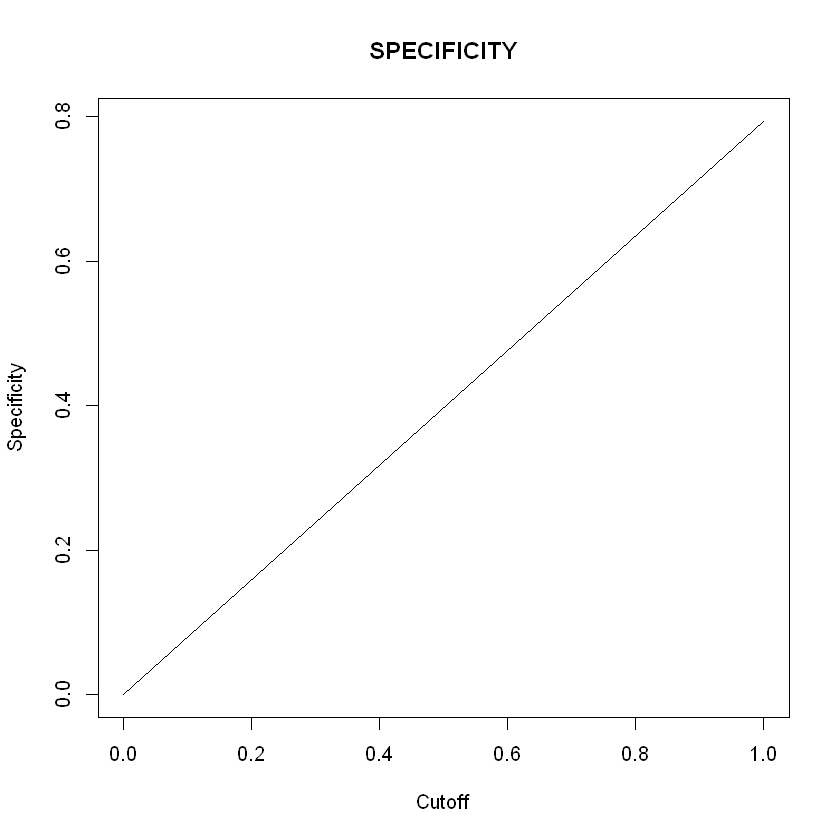

In [19]:
#SPECIFICITY CON CUTOFF
perf3<-performance(prediction_tweetsrr,"spec")
plot(perf3)
title('SPECIFICITY')

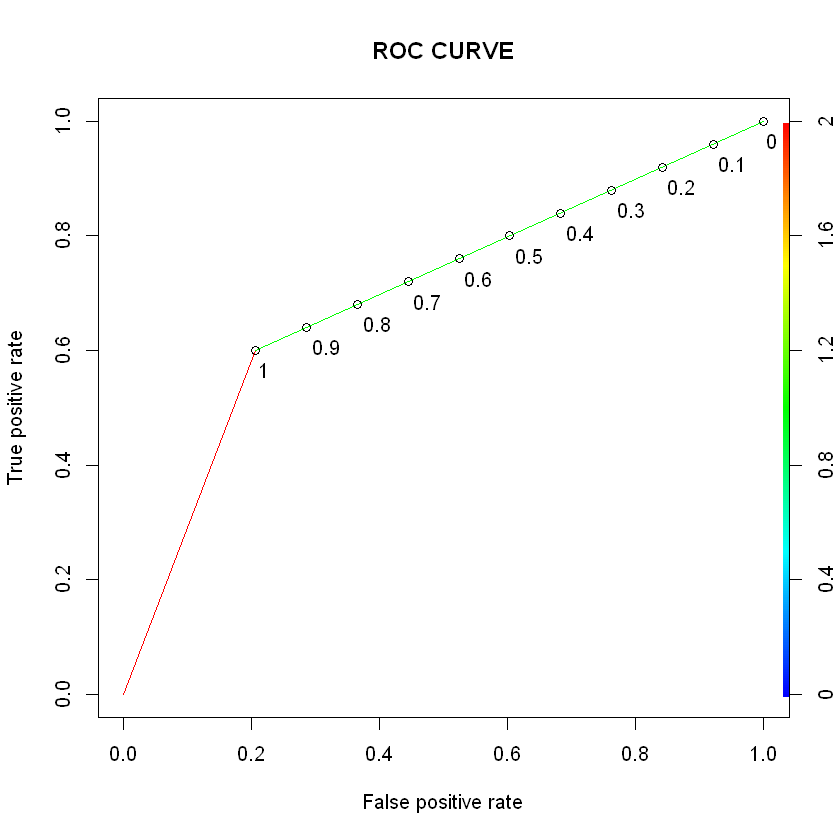

In [20]:
#CURVA ROC
perf4<-performance(prediction_tweetsrr,"tpr","fpr")
plot(perf4, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('ROC CURVE')

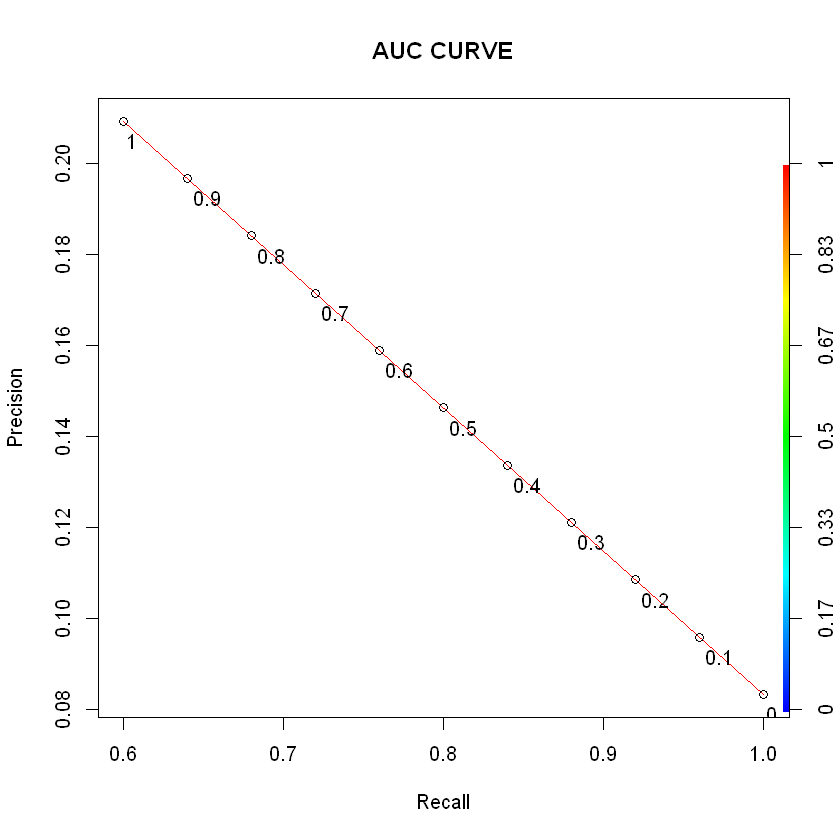

In [21]:
#Curva AUC
ROCRrec <- performance(prediction_tweetsrr, measure = "prec", x.measure = "rec")
plot(ROCRrec, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('AUC CURVE')

## Random Forest
### Random Forest es uno de esos algoritmos de aprendizaje automático de conjuntos muy potentes que funciona creando múltiples árboles de decisión y luego combinando la salida generada por cada uno de los árboles de decisión. Por ende es mucho mas efectivo que el decision tree que tiene un aprendizaje bajo, por lo que este modelo nos ayudara a obtener un mejor desempeño de nuestro modelo


Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

[1] "Primer modelo sin el número de nodos definidos"



Call:
 randomForest(formula = toxic ~ mentions + sentiment + num_bad_words,      data = toxicTrain, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.07038592
                    % Var explained: 7.86

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

[1] "Segundo modelo con el número de nodos definidos"



Call:
 randomForest(formula = toxic ~ mentions + sentiment + num_bad_words,      data = toxicTrain, ntree = 20, mtry = 2, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 20
No. of variables tried at each split: 2

          Mean of squared residuals: 0.07512258
                    % Var explained: 1.66

[1] "TRAIN"
[1] "Matriz de confusion de Random forest"


         
predTrain   0   1
        0 324   9
        1  61  26

[1] "Accuracy de Random forest"


[1] 0.8333333

[1] "Error de Random forest"


[1] 0.1666667

[1] "TEST"
[1] "Accuracy de Random forest"


[1] 0.8055556

[1] "Error de Random forest"


[1] 0.1944444

[1] "Matriz de confusion de Random forest"


         
predValid   0   1
        0 137   7
        1  28   8

,%IncMSE,IncNodePurity
mentions,0.5108322,1.883564
sentiment,2.1250860,2.715958
num_bad_words,6.3909023,3.930075


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message

[1] 0.8 0.8 0.8 0.8 0.8 0.8

[1] "Número de nodos donde la ganancia es máxima"


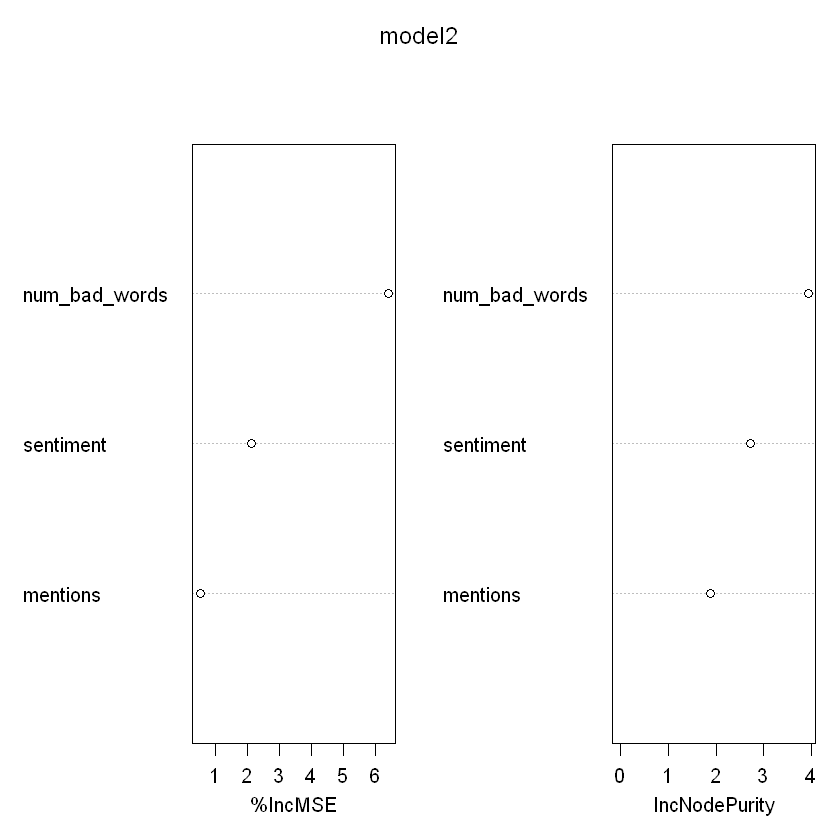

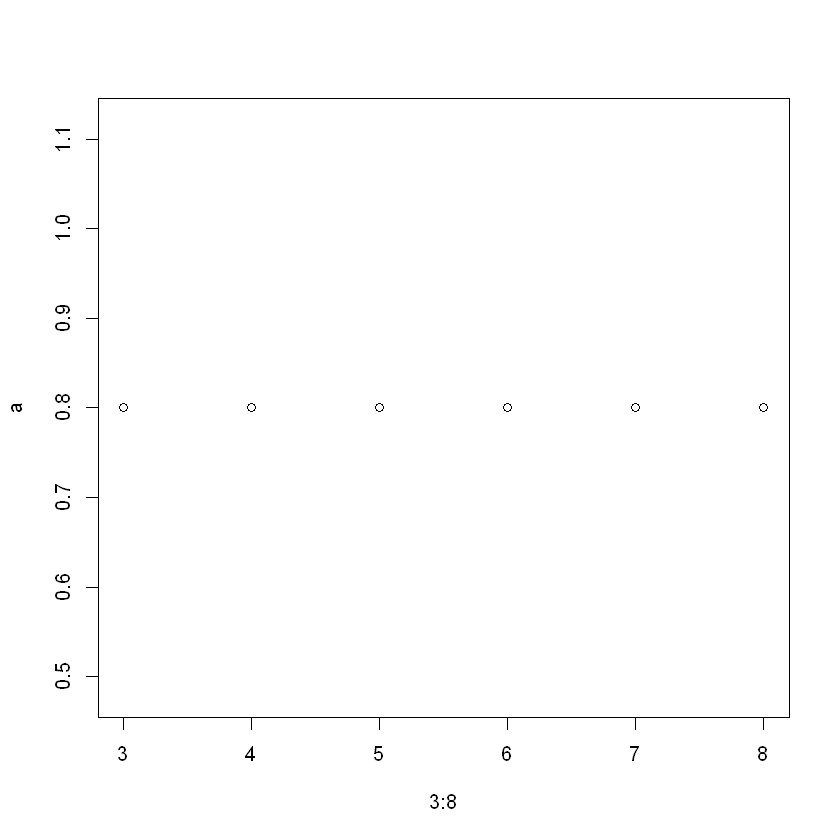

In [22]:
#Random Forest Model
library(dplyr)
library(randomForest)

#Primer modelo si hiper parámetros definidos
model1 <- randomForest(toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain, importance = TRUE)
print('Primer modelo sin el número de nodos definidos')
model1

#Segundo modelo con el número de nodos definidos
model2 <- randomForest(toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain, ntree = 20, mtry = 2, importance = TRUE)

print('Segundo modelo con el número de nodos definidos')
model2

#Predicting on train set
predTrain <- ifelse(predict(model2, toxicTrain, type = "class")>.1,1,0)

# Checking classification accuracy
print('TRAIN')
print('Matriz de confusion de Random forest')
table(predTrain, toxicTrain$toxic) #Matriz de confusion del train
print('Accuracy de Random forest')
mean(predTrain == toxicTrain$toxic)  #Accuracy del train
print('Error de Random forest')
1-mean(predTrain == toxicTrain$toxic)  #Error del train

# Predicting on Validation set
predValid <- ifelse(predict(model2, toxicTest, type = "class")>.1,1,0)
print('TEST')

# Checking classification accuracy
print('Accuracy de Random forest')
mean(predValid == toxicTest$toxic)  #Accuracy del validation
print('Error de Random forest')
1-mean(predValid == toxicTest$toxic)  #Error del validation
print('Matriz de confusion de Random forest')
table(predValid,toxicTest$toxic) # Matriz de confusión
importance(model2)        
varImpPlot(model2)  
a=c()
i=5
for (i in 3:8) {
  model3 <- randomForest(toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain, ntree = 500, mtry = i, importance = TRUE)
  predValid <- ifelse(predict(model3, toxicTest, type = "class")>.1,1,0)
  a[i-2] = mean(predValid == toxicTest$toxic)
}
 
a
print('Número de nodos donde la ganancia es máxima')
plot(3:8,a)

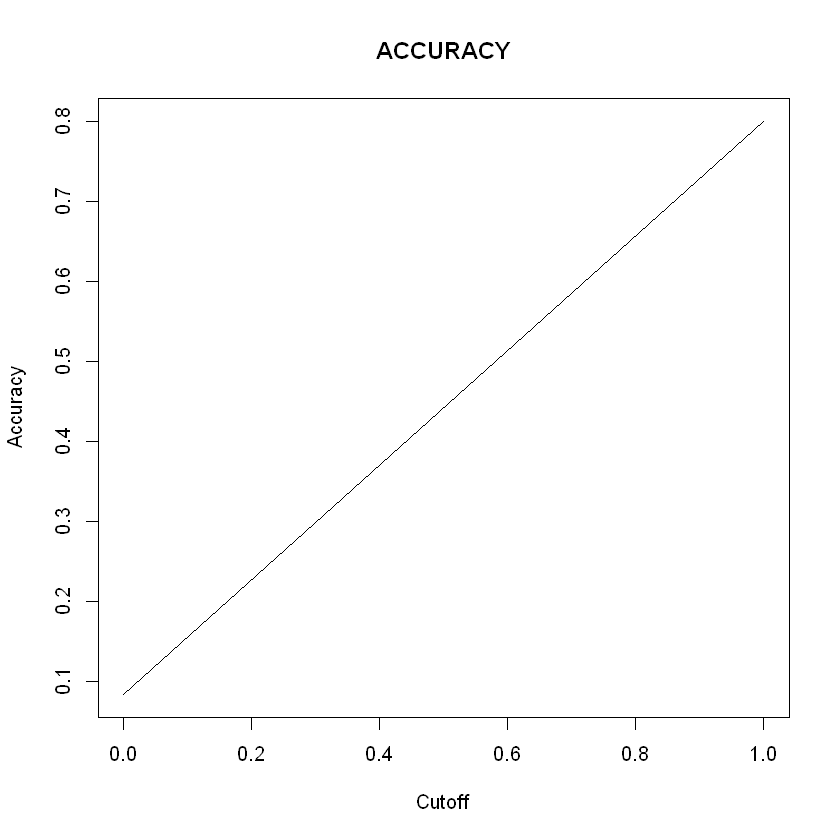

In [23]:
#ACCURACY CON CUTOFF
prediction_tweetsrf<-prediction(predValid,toxicTest$toxic)
perf<-performance(prediction_tweetsrf,"acc")
plot(perf)
title('ACCURACY')

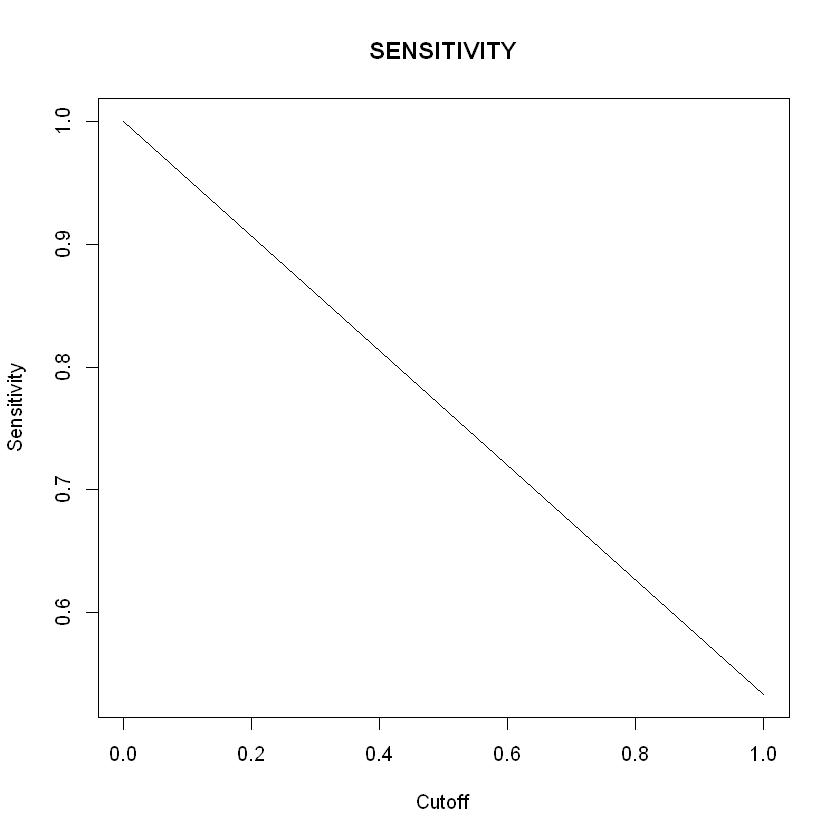

In [24]:
#SENSITIVITY CON CUTOFF
perf2<-performance(prediction_tweetsrf,"sens")
plot(perf2)
title('SENSITIVITY')

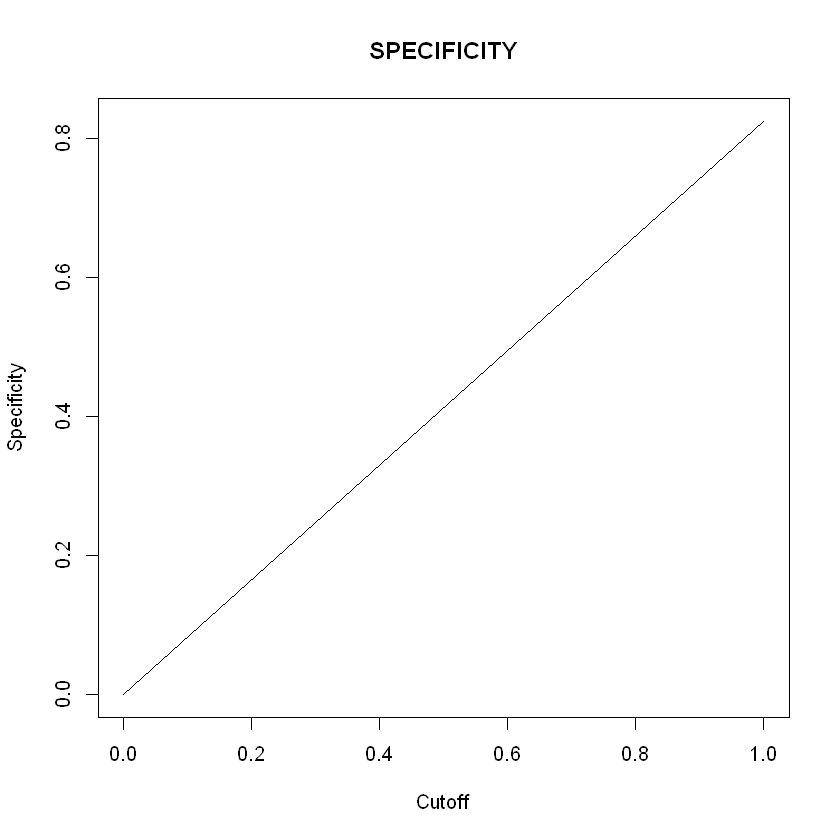

In [25]:
#SPECIFICITY CON CUTOFF
perf3<-performance(prediction_tweetsrf,"spec")
plot(perf3)
title('SPECIFICITY')

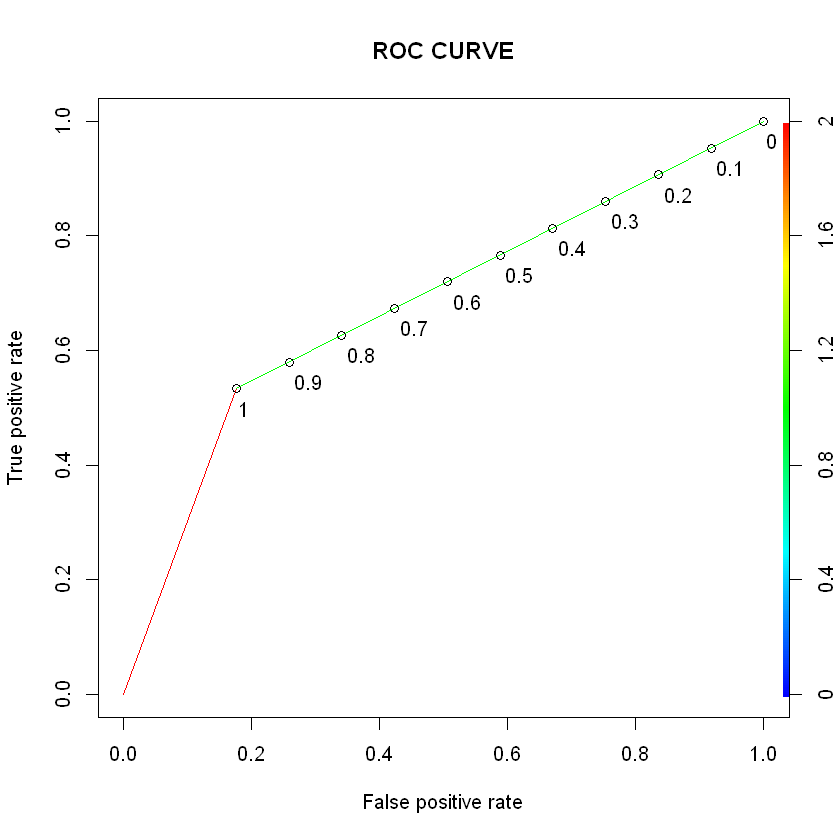

In [26]:
#CURVA ROC
perf4<-performance(prediction_tweetsrf,"tpr","fpr")
plot(perf4, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('ROC CURVE')

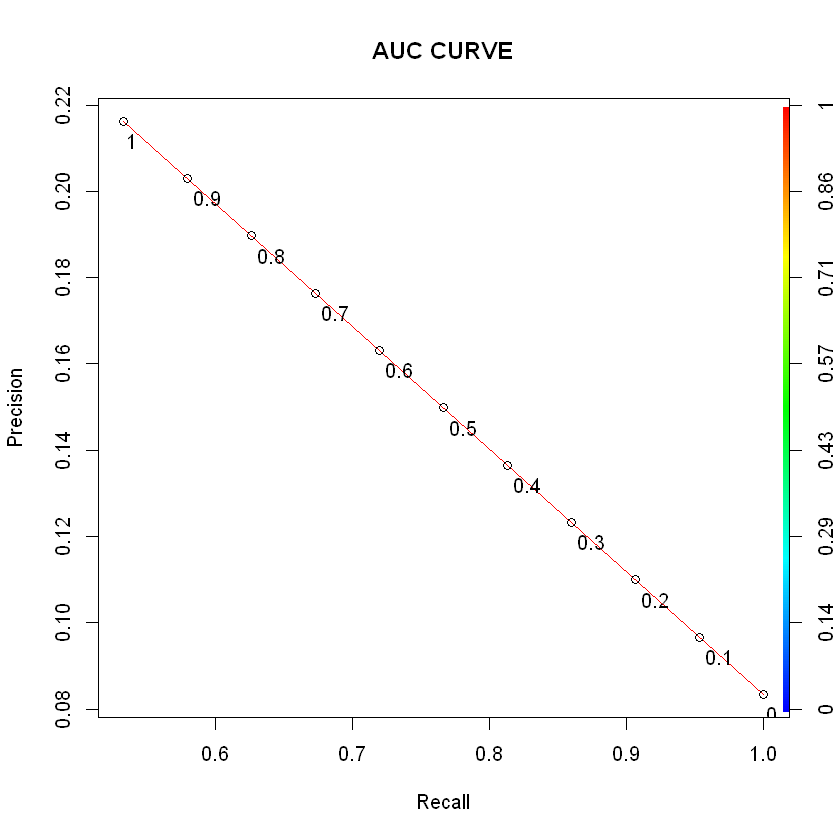

In [27]:
#Curva AUC
ROCRrec <- performance(prediction_tweetsrf, measure = "prec", x.measure = "rec")
plot(ROCRrec, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('AUC CURVE')

# Using Gradient Boosting

gbm(formula = toxic ~ mentions + sentiment + num_bad_words, distribution = "gaussian", 
    data = toxicTrain, n.trees = 10000, interaction.depth = 4, 
    shrinkage = 0.01)
A gradient boosted model with gaussian loss function.
10000 iterations were performed.
There were 3 predictors of which 3 had non-zero influence.

,var,rel.inf
num_bad_words,num_bad_words,40.94008
mentions,mentions,33.84237
sentiment,sentiment,25.21756


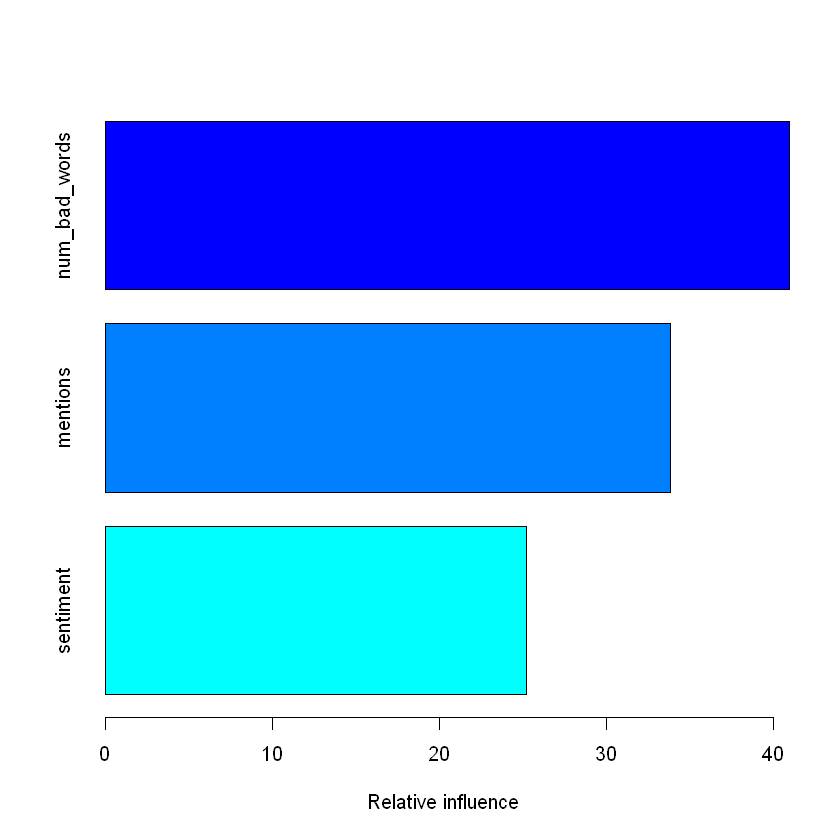

In [42]:
library(gbm)
library(MASS)
# Usando el modelo de Gradient Boosting con 10000 árboles
model <- gbm(toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain, # the data   
                 distribution = "gaussian",n.trees = 10000,
                  shrinkage = 0.01, interaction.depth = 4)  
model
summary(model)

In [47]:
#Correlaciones del feature a predecir
cor(tweets$num_bad_words,tweets$toxic)
cor(tweets$sentiment,tweets$toxic)
cor(tweets$mentions,tweets$toxic)


[1] 0.1298875

[1] 0.07458993

[1] 0.005975862

[1] 420 100

100        200        300        400        500        600 
0.06805120 0.06629722 0.06568800 0.06538115 0.06507541 0.06485518

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): objeto 'test.err' no encontrado


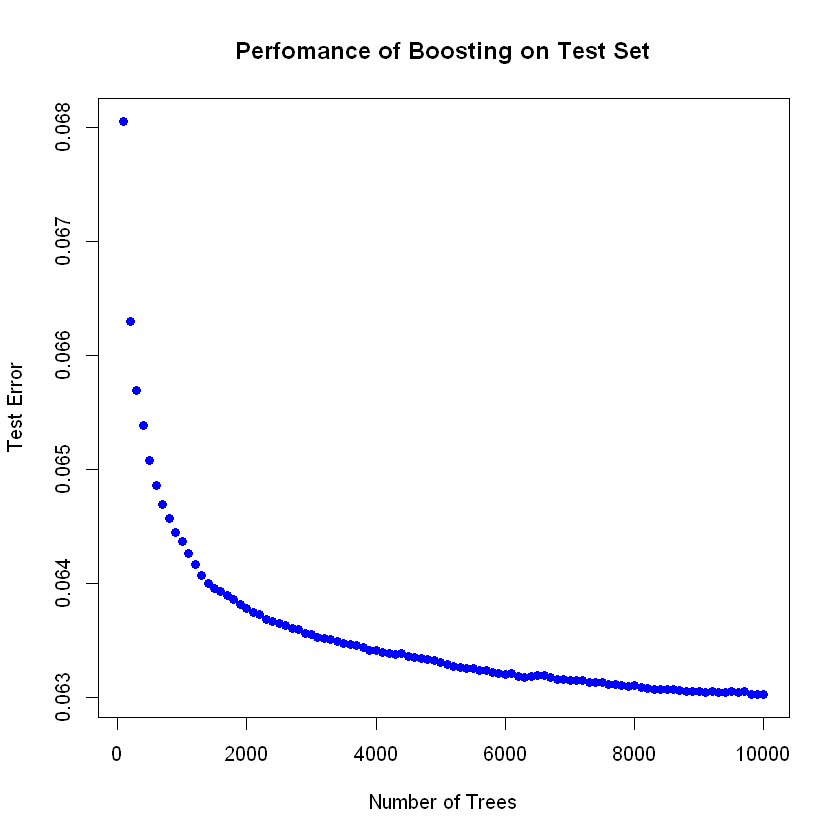

In [49]:
n.trees = seq(from=100 ,to=10000, by=100) #no of trees-a vector of 100 values 

#Generating a Prediction matrix for each Tree
predmatrix<-predict(model,toxicTrain,n.trees = n.trees)
dim(predmatrix) #dimentions of the Prediction Matrix

#Calculating The Mean squared Test Error
test.error<-with(toxicTrain,apply( (predmatrix-toxic)^2,2,mean))
head(test.error) #contains the Mean squared test error for each of the 100 trees averaged

#Plotting the test error vs number of trees

plot(n.trees , test.error , pch=19,col="blue",xlab="Number of Trees",ylab="Test Error", main = "Perfomance of Boosting on Test Set")

#adding the RandomForests Minimum Error line trained on same data and similar parameters
abline(h = min(test.err),col="red") #test.err is the test error of a Random forest fitted on same data
legend("topright",c("Minimum Test error Line for Random Forests"),col="red",lty=1,lwd=1)



In [54]:
#Predicción del train
predTrain <- ifelse(predict(model, toxicTrain, n.trees = 10000)>.1,1,0)
print('TRAIN')
print('Matriz de confusion de Gradient Boosting')
table(predTrain, toxicTrain$toxic) #Matriz de confusión del train
print('Accuracy de Gradient Boosting')
mean(predTrain == toxicTrain$toxic) #Accuracy del train
print('Error de Gradient Boosting')
1-mean(predTrain == toxicTrain$toxic) #Error del train
# Predicting on Validation set
predValid <- ifelse(predict(model, toxicTest, n.trees = 10000)>.1,1,0)
print('TEST')
# Checking classification accuracy
print('Accuracy de Gradient Boosting')
mean(predValid == toxicTest$toxic) #Accuracy del validation
print('Error de Gradient Boosting')
1-mean(predValid == toxicTest$toxic) #Error del validation
print('Matriz de confusion de Gradient Boosting')
table(predValid,toxicTest$toxic) #Matris de confusión


[1] "TRAIN"
[1] "Matriz de confusion de Gradient Boosting"


         
predTrain   0   1
        0 320   9
        1  65  26

[1] "Accuracy de Gradient Boosting"


[1] 0.8238095

[1] "Error de Gradient Boosting"


[1] 0.1761905

[1] "TEST"
[1] "Accuracy de Gradient Boosting"


[1] 0.7833333

[1] "Error de Gradient Boosting"


[1] 0.2166667

[1] "Matriz de confusion de Gradient Boosting"


         
predValid   0   1
        0 133   7
        1  32   8

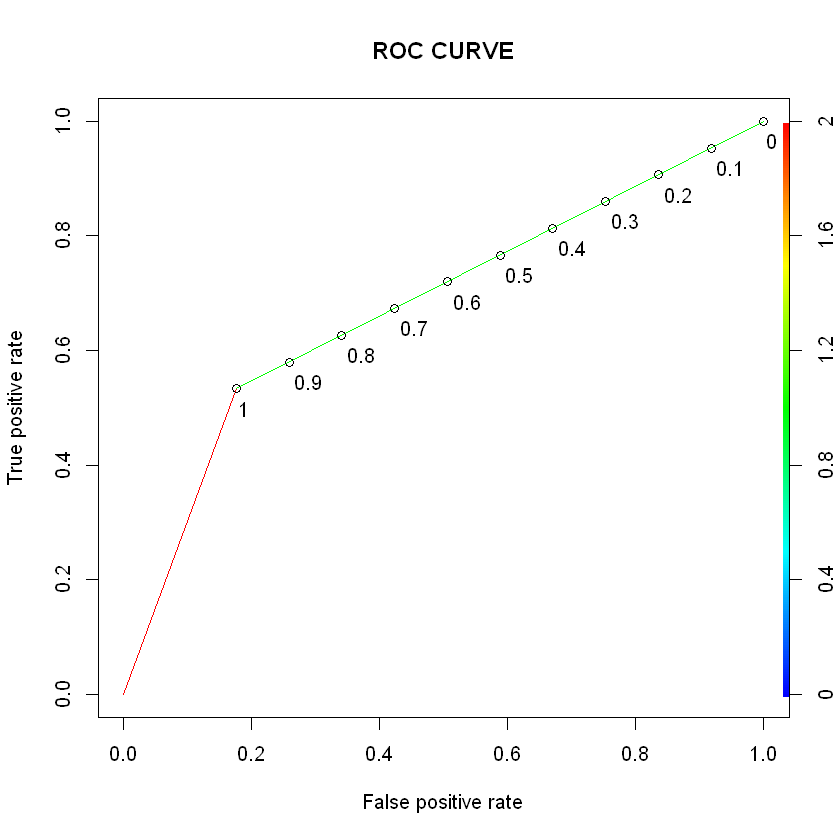

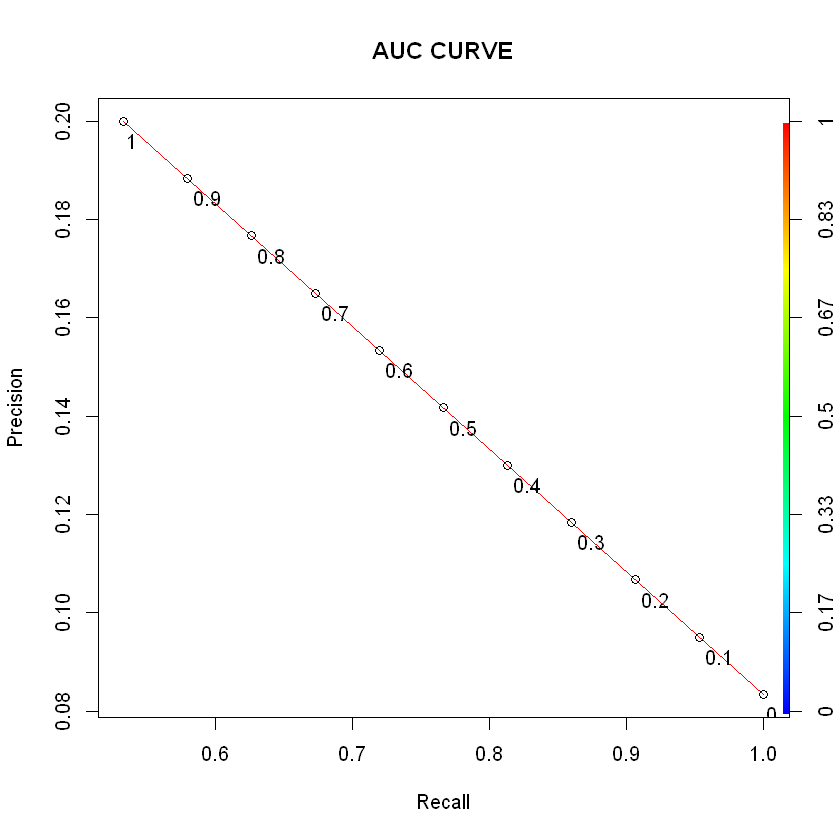

In [55]:
prediction_tweetsgbm<-prediction(predValid,toxicTest$toxic)
#Curva ROC
perf<-performance(prediction_tweetsgbm,"tpr","fpr")
plot(perf4, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('ROC CURVE')

#Curva AUC
ROCRrec <- performance(prediction_tweetsgbm, measure = "prec", x.measure = "rec")
plot(ROCRrec, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('AUC CURVE')

# Comparing ROC of all models

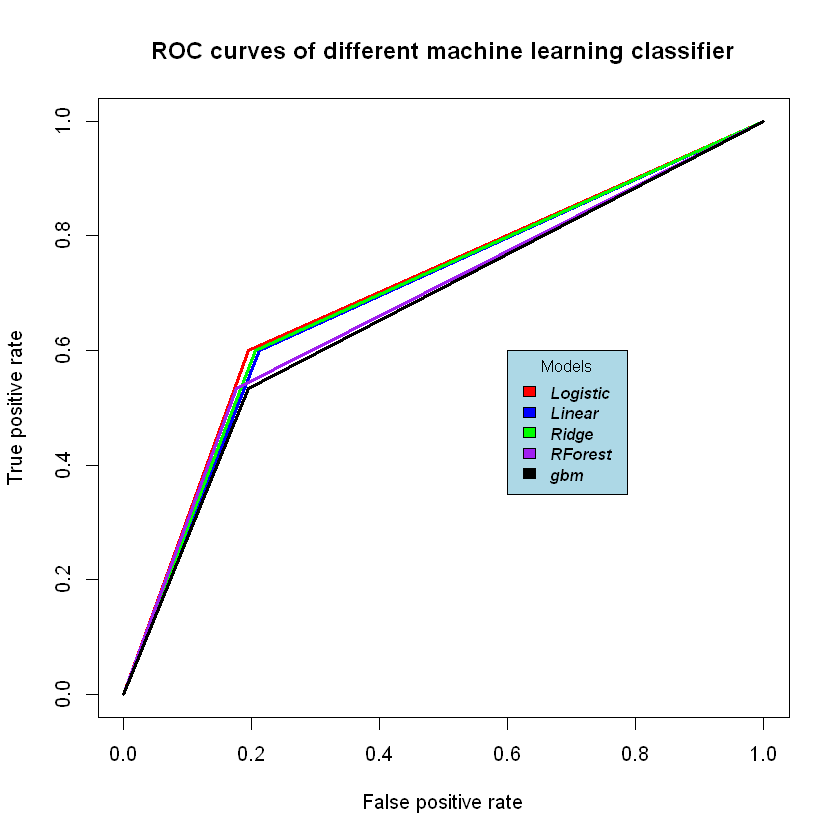

In [72]:
#Logistic Regression
perf4<-performance(prediction_tweets,"tpr","fpr")
plot(perf4, lwd=3,col="red", main="ROC curves of different machine learning classifier")
#legend
legend(0.6, 0.6, legend=c('Logistic','Linear','Ridge','RForest','gbm'),fill=c("red","blue","green","purple","black"), 4:6,cex=0.8,title="Models", text.font=4, bg='lightblue')

#Linear Regression
perf4<-performance(prediction_tweetsm2,"tpr","fpr")
plot(perf4,col="blue",add = TRUE,lwd=3)

#Ridge Regression
perf4<-performance(prediction_tweetsrr,"tpr","fpr")
plot(perf4,col="green",add = TRUE,lwd=3)

#Random Forest
perf4<-performance(prediction_tweetsrf,"tpr","fpr")
plot(perf4,col="purple", add = TRUE,lwd=3)

#GBM
perf4<-performance(prediction_tweetsgbm,"tpr","fpr")
plot(perf4,col="black", add = TRUE,lwd=3)

